In [1]:
import pandas as pd
pima = pd.read_csv("diabetes.csv")
pima

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [6]:
feature_cols=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
X=pima[feature_cols]
y=pima.Outcome

In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [8]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(X_train,y_train)
y_predict=logreg.predict(X_test)

C:\Users\Public\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


# import metrix class

In [9]:
from sklearn import metrics
cnf_matrix=metrics.confusion_matrix(y_test,y_predict)
cnf_matrix

array([[119,  11],
       [ 26,  36]], dtype=int64)

# confusion matrix evolution matrix

In [10]:
print("Accuracy:",metrics.accuracy_score(y_test,y_predict))
print("Precision:",metrics.precision_score(y_test,y_predict))
print("Recall:",metrics.recall_score(y_test,y_predict))


Accuracy: 0.8072916666666666
Precision: 0.7659574468085106
Recall: 0.5806451612903226


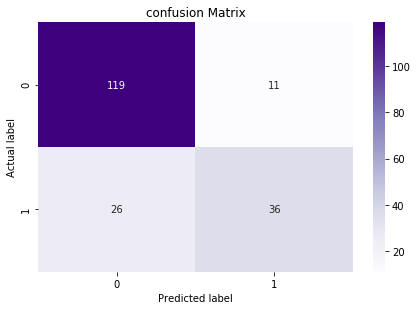

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
class_names=[0,1]
fig,ax=plt.subplots()
tick_marks=np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)
sns.heatmap(pd.DataFrame(cnf_matrix),annot=True,cmap='Purples',fmt='g')
plt.tight_layout()
plt.xlabel("Predicted label")
plt.ylabel("Actual label")
plt.title("confusion Matrix")
plt.show()

# ROC curve shows the tradeoff between sensitivity and specificity

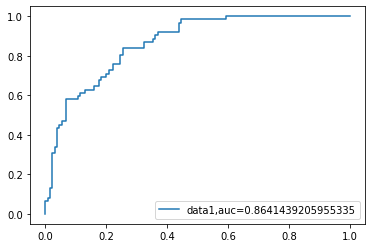

In [16]:
y_predict_proba=logreg.predict_proba(X_test)[::,1]
fpr,tpr,_=metrics.roc_curve(y_test,y_predict_proba)
auc=metrics.roc_auc_score(y_test,y_predict_proba)
plt.plot(fpr,tpr,label="data1,auc="+str(auc))
plt.legend(loc="best")
plt.show()